# Image Processing Techniques

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Image Transformations

### Resizing

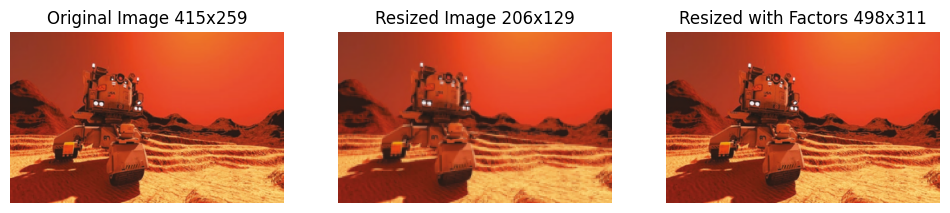

In [4]:
# Load image
imagePath = "images/marsrover.png"
image = cv2.imread(imagePath)

# Get image shape which returns height, width, and channels as a tuple. Calculate the aspect ratio
(h, w) = image.shape[:2]
aspect = w / h

# let's resize the image to decrease height by half of the original image.
height = int(0.5 * h)
width =  int(height * aspect)

# New image dimension as a tuple
dimension = (width, height)
resizedImage = cv2.resize(image, dimension, interpolation=cv2.INTER_AREA)

# Resize using x and y factors
resizedWithFactors = cv2.resize(image, None, fx=1.2, fy=1.2,
interpolation=cv2.INTER_LANCZOS4)

# Show the original iamge, resized image, and resized image with factorsusing using matplotlib
# use matplotlib to show the images
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Original Image {image.shape[1]}x{image.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
plt.title(f"Resized Image {resizedImage.shape[1]}x{resizedImage.shape[0]}")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(resizedWithFactors, cv2.COLOR_BGR2RGB))
plt.title(f"Resized with Factors {resizedWithFactors.shape[1]}x{resizedWithFactors.shape[0]}")
plt.axis('off')

plt.show()

### Translation

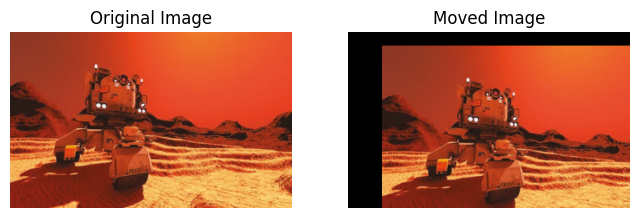

In [5]:
# Image translation using OpenCV's warpAffine() to move image along x- and y-axes
# Load image
imagePath = "images/marsrover.png"
image = cv2.imread(imagePath)

# Define translation matrix
translationMatrix = np.float32([[1,0,50],[0,1,20]])
# Move the image
movedImage = cv2.warpAffine(image, translationMatrix, (image.shape[1], image.shape[0]))

# Show the original image and moved image using matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(movedImage, cv2.COLOR_BGR2RGB))
plt.title("Moved Image")
plt.axis('off')

plt.show()

### Rotation

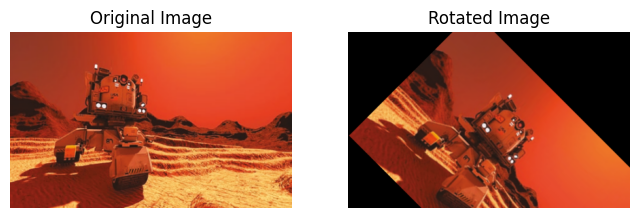

In [6]:
# Load image
imagePath = "images/marsrover.png"
image = cv2.imread(imagePath)
(h,w) = image.shape[:2]

# Define translation matrix
center = (h//2, w//2)
angle = -45 # Rotation angle in degrees for clockwise rotation
scale = 1.0 # Resizing scale

rotationMatrix = cv2.getRotationMatrix2D(center, angle, scale)

# Rotate the image
rotatedImage = cv2.warpAffine(image, rotationMatrix, (image.shape[1], image.shape[0]))

# Show the original image and rotated image using matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotatedImage, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')

plt.show()

### Flipping

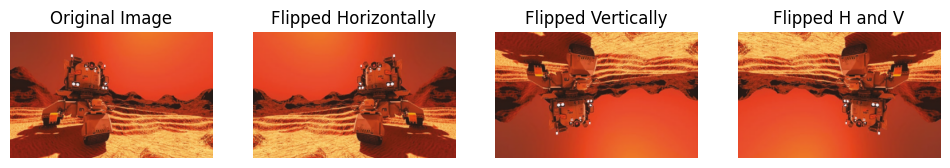

In [7]:
# Load image
imagePath = "images/marsrover.png"
image = cv2.imread(imagePath)

# Flip horizontally
flippedHorizontally = cv2.flip(image, 1)

# Flip vertically
flippedVertically = cv2.flip(image, 0)

# Flip horizontally and then vertically
flippedHV = cv2.flip(image, -1)

# Show the original image and flipped images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(flippedHorizontally, cv2.COLOR_BGR2RGB))
plt.title("Flipped Horizontally")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(flippedVertically, cv2.COLOR_BGR2RGB))
plt.title("Flipped Vertically")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(flippedHV, cv2.COLOR_BGR2RGB))
plt.title("Flipped H and V")
plt.axis('off')

plt.show()

### Cropping

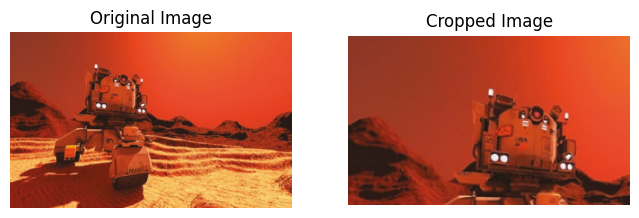

In [ ]:
# Load image
imagePath = "images/marsrover.png"
image = cv2.imread(imagePath)

# Crop the image to get only the face of the zebra
croppedImage = image[0:150, 0:250]

# Show the original image and cropped image using matplotlib
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(croppedImage, cv2.COLOR_BGR2RGB))
plt.title("Cropped Image")
plt.axis('off')

plt.show()

## Image Arithmetic & Bitwise Operations

### Addition

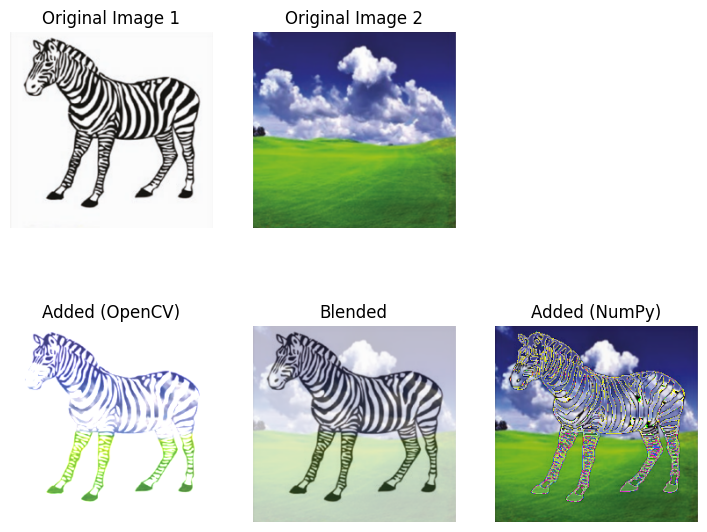

In [9]:
# Load images
img1 = cv2.imread('images/zebra.png')
img2 = cv2.imread('images/nature.png')

# Ensure same size
height, width = img1.shape[:2]
img1 = cv2.resize(img1, (width, height))
img2 = cv2.resize(img2, (width, height))

# Method 1: Simple addition (OpenCV - saturated)
added_cv = cv2.add(img1, img2)

# Method 2: Weighted addition (blending)
# dst = α·img1 + β·img2 + γ
alpha = 0.7  # Weight for first image
beta = 0.3   # Weight for second image
gamma = 0    # Additional brightness

blended = cv2.addWeighted(img1, alpha, img2, beta, gamma)

# Method 3: NumPy addition (wraps around - usually not desired!)
added_numpy = img1 + img2  # This can overflow!

# Show results using matplotlib - show the original iamges in the same row and below them the results
plt.figure(figsize=(12, 7))

# Original images
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Original Image 2")
plt.axis('off')

# Results
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(added_cv, cv2.COLOR_BGR2RGB))
plt.title("Added (OpenCV)")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
plt.title("Blended")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(added_numpy, cv2.COLOR_BGR2RGB))
plt.title("Added (NumPy)")
plt.axis('off')

plt.show()

### Substraction

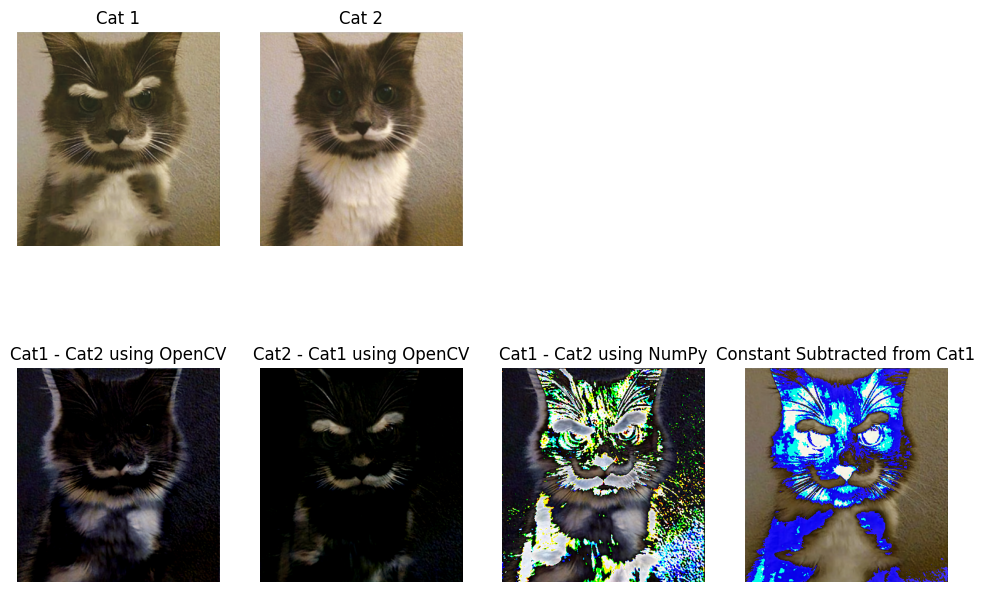

In [10]:
image1 = cv2.imread("images/cat1.png")
image2 = cv2.imread("images/cat2.png")

# resize the two images to make them of the same dimensions. This is a must to subtract two images
height, width = image1.shape[:2]
image2 = cv2.resize(image2, (width, height))

# Subtract image 1 from 2
subtractedImage21 = cv2.subtract(image2, image1)

# subtract image 2 from 1
subtractedImage12 = cv2.subtract(image1, image2)

# Numpy Subtraction image 1 from 2
subtractedImage2 = image2 - image1

# A constant subtraction
subtractedImage3 = image1 - 50

# Show results using matplotlib - show the original iamges cat1 and cat2 in the same row and in the row below show the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("Cat 1")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("Cat 2")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(subtractedImage21, cv2.COLOR_BGR2RGB))
plt.title("Cat1 - Cat2 using OpenCV")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(subtractedImage12, cv2.COLOR_BGR2RGB))
plt.title("Cat2 - Cat1 using OpenCV")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(subtractedImage2, cv2.COLOR_BGR2RGB))
plt.title("Cat1 - Cat2 using NumPy")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(subtractedImage3, cv2.COLOR_BGR2RGB))
plt.title("Constant Subtracted from Cat1")
plt.axis("off")

plt.show()

### Bitwise Operations

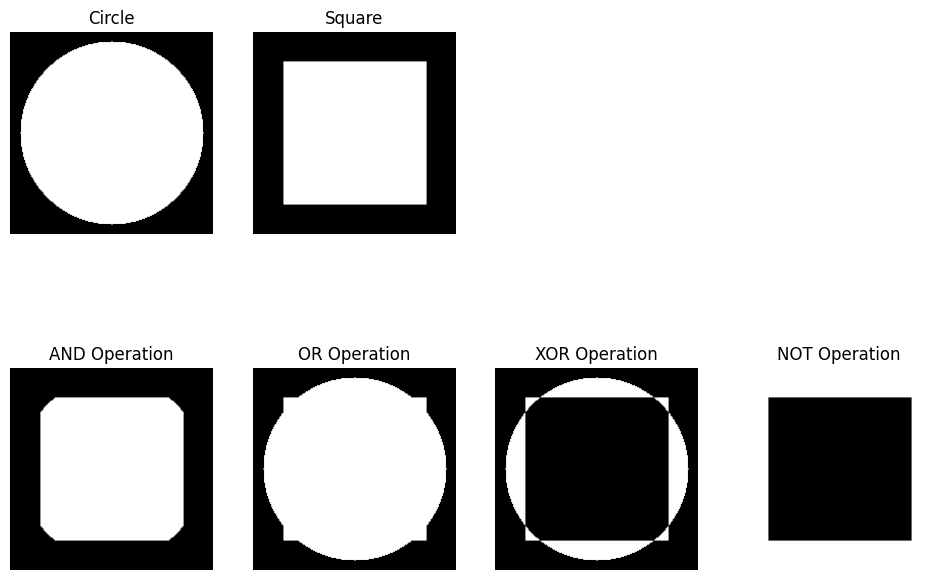

In [11]:
# create a circle
circle = cv2.circle(np.zeros((200, 200, 3), dtype = "uint8"), (100,100), 90, (255,255,255), -1)

# create a square
square = cv2.rectangle(np.zeros((200,200,3), dtype= "uint8"), (30,30),
(170,170),(255,255,255), -1)

# bitwise AND
bitwiseAnd = cv2.bitwise_and(square, circle)

# bitwise OR
bitwiseOr = cv2.bitwise_or(square, circle)

# bitwise XOR
bitwiseXor = cv2.bitwise_xor(square, circle)

# bitwise NOT
bitwiseNot = cv2.bitwise_not(square)

# Show results using matplotlib - show the circle and square in the same row and in the row below show the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(circle, cv2.COLOR_BGR2RGB))
plt.title("Circle")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(square, cv2.COLOR_BGR2RGB))
plt.title("Square")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(bitwiseAnd, cv2.COLOR_BGR2RGB))
plt.title("AND Operation")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(bitwiseOr, cv2.COLOR_BGR2RGB))
plt.title("OR Operation")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(bitwiseXor, cv2.COLOR_BGR2RGB))
plt.title("XOR Operation")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(bitwiseNot, cv2.COLOR_BGR2RGB))
plt.title("NOT Operation")
plt.axis("off")

plt.show()

### Masking

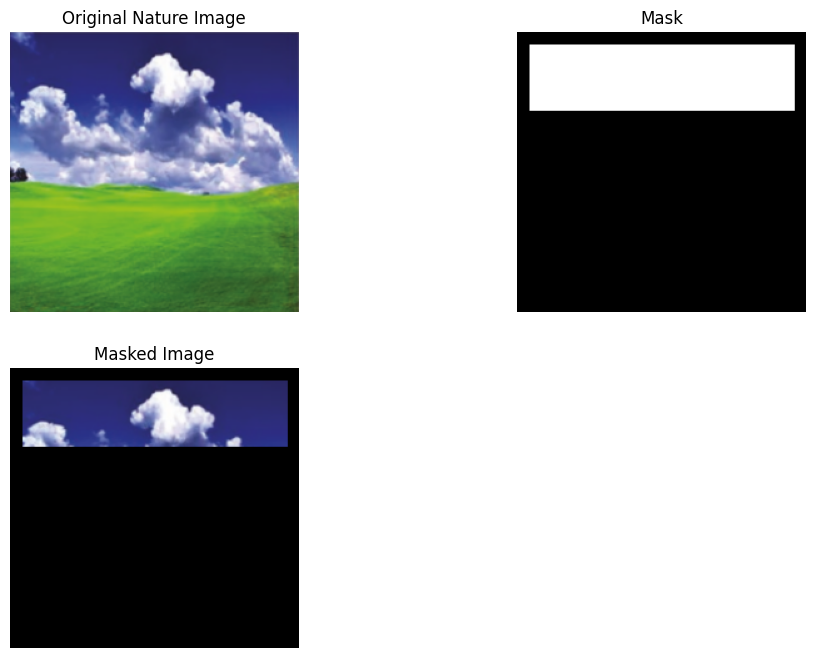

In [12]:
# Load an image
natureImage = cv2.imread("images/nature.png")

# Create a rectangular mask
maskImage = cv2.rectangle(img = np.zeros(natureImage.shape[:2], dtype="uint8"), 
                          pt1 = (10, 10), 
                          pt2 = (int(natureImage.shape[1])-10, int(natureImage.shape[0] / 2)-50), 
                          color = (255, 255,255), 
                          thickness = -1
                          )

# Using bitwise_and operation to perform masking. Notice the mask=maskImage argument
masked = cv2.bitwise_and(natureImage, natureImage, mask=maskImage)

# Show results using matplotlib - show the original nature image and mask in the same row and in the row below show the masked image
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(natureImage, cv2.COLOR_BGR2RGB))
plt.title("Original Nature Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(maskImage, cv2.COLOR_BGR2RGB))
plt.title("Mask")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.title("Masked Image")
plt.axis("off")

plt.show()

## Image Filtering & Bluring

### Mean Filtering/Averaging

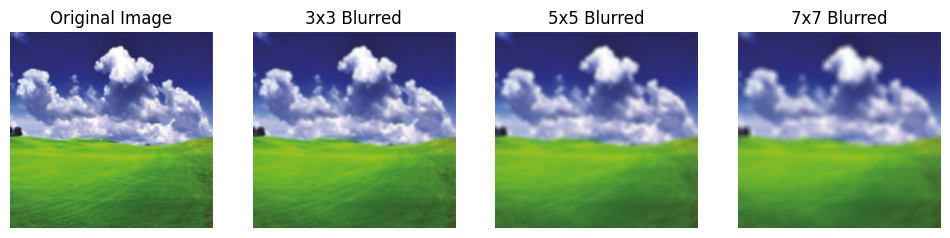

In [13]:
# Load the image
img = cv2.imread("images/nature.png")

# Define the kernel
kernel = (3,3)
blurred3x3 = cv2.blur(img,kernel)

# Blur with 5x5 kernel
blurred5x5 = cv2.blur(img,(5,5))

# Blur with 7x7 kernel
blurred7x7 = cv2.blur(img, (7,7))

# Show results using matplotlib - show the original nature image in the first column and in the next columns show the blurred images with different kernel sizes
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(blurred3x3, cv2.COLOR_BGR2RGB))
plt.title("3x3 Blurred")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(blurred5x5, cv2.COLOR_BGR2RGB))
plt.title("5x5 Blurred")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(blurred7x7, cv2.COLOR_BGR2RGB))
plt.title("7x7 Blurred")
plt.axis("off")

plt.show()

### Gaussian Filtering

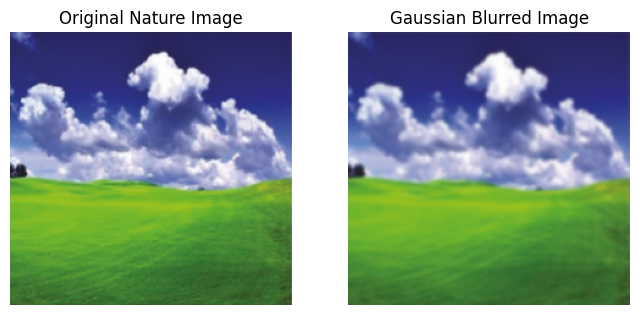

In [14]:
# Load the nature image
natureImg = cv2.imread("images/nature.png")

# Gaussian blurring with 3x3 kernel height and 0 for standard deviation to calculate from the kernel
GaussianFiltered = cv2.GaussianBlur(src = natureImg, ksize = (5,5), sigmaX = 0)

# Show the original nature image and the Gaussian filtered image using matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(natureImg, cv2.COLOR_BGR2RGB))
plt.title("Original Nature Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(GaussianFiltered, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurred Image")
plt.axis("off")

plt.show()

### Median Bluring

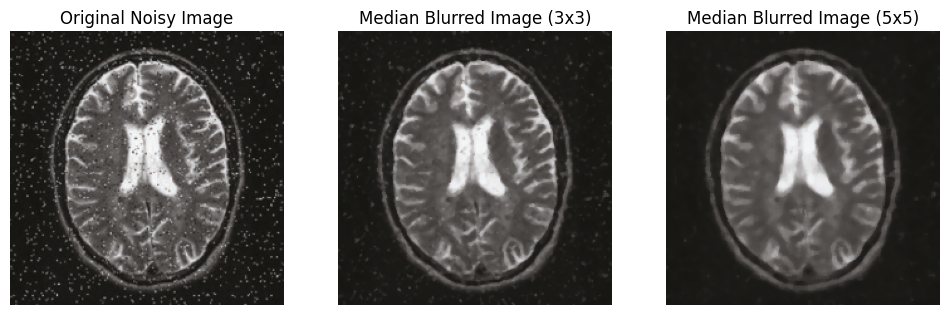

In [15]:
# Load a noisy image
saltpepperImage = cv2.imread("images/salt_pepper.png")

# Median filtering for noise reduction
blurredImage3 = cv2.medianBlur(saltpepperImage, 3)

# Median filtering for noise reduction
blurredImage5 = cv2.medianBlur(saltpepperImage, 5)

# Show the original noisy image and the median filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(saltpepperImage, cv2.COLOR_BGR2RGB))
plt.title("Original Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurredImage3, cv2.COLOR_BGR2RGB))
plt.title("Median Blurred Image (3x3)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blurredImage5, cv2.COLOR_BGR2RGB))
plt.title("Median Blurred Image (5x5)")
plt.axis("off")

plt.show()

### Bilateral Bluring

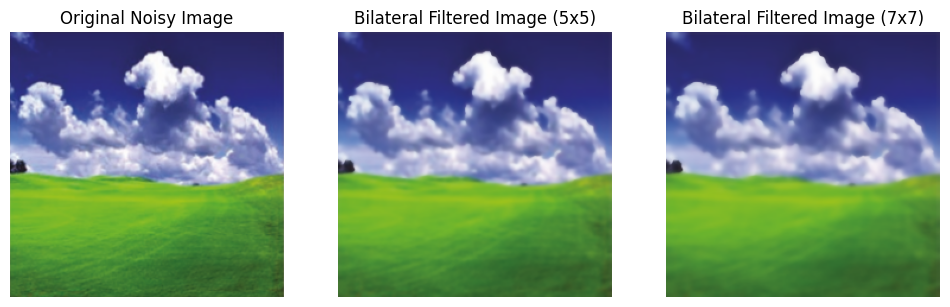

In [16]:
# Load a noisy image
noisyImage = cv2.imread("images/nature.png")

# Bilateral Filter with kernel 5
filteredImage5 = cv2.bilateralFilter(noisyImage, 5, 150,50)

# Bilateral blurring with kernel 7
filteredImage7 = cv2.bilateralFilter(noisyImage, 7, 160,60)

# Show the original noisy image and the bilateral filtered images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(noisyImage, cv2.COLOR_BGR2RGB))
plt.title("Original Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(filteredImage5, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filtered Image (5x5)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(filteredImage7, cv2.COLOR_BGR2RGB))
plt.title("Bilateral Filtered Image (7x7)")
plt.axis("off")

plt.show()

## Binarization & Thresholding

### Simple Thresholding

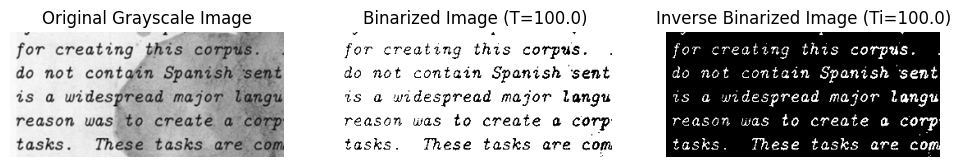

In [17]:
# Load an image
image = cv2.imread("images/scanned_doc.png")
# convert the image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using thresholding
(T, binarizedImage) = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Binarization with inverse thresholding
(Ti, inverseBinarizedImage) = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY_INV)

# Show the original grayscale image, binarized image, and inverse binarized image using matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binarizedImage, cmap='gray')
plt.title(f"Binarized Image (T={T})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(inverseBinarizedImage, cmap='gray')
plt.title(f"Inverse Binarized Image (Ti={Ti})")
plt.axis("off")

plt.show()

### Adaptive Thresholding

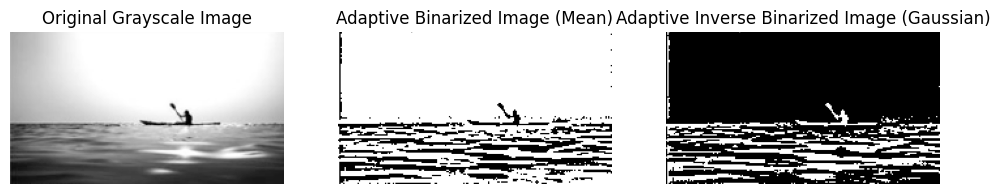

In [19]:
# Load an image
image = cv2.imread("images/boat.png")
# convert the image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarization using adaptive thresholding and simple mean
#  taking the mean of pixels surrounding it
binarized = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 3)

# Binarization using adaptive thresholding and Gaussian Mean
# taking a weighted mean where the weights are a Gaussian window
binarized_inv = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

# Show the original grayscale image, adaptive binarized image and adaptive inverse binarized image using matplotlib
plt.figure(figsize=(12, 4)) 
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binarized, cmap='gray')
plt.title("Adaptive Binarized Image (Mean)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(binarized_inv, cmap='gray')
plt.title("Adaptive Inverse Binarized Image (Gaussian)")
plt.axis("off")

plt.show()

### Otsu's Binarization

Threshold value with Otsu binarization 175.0
Threshold value with Otsu inverse binarization 175.0


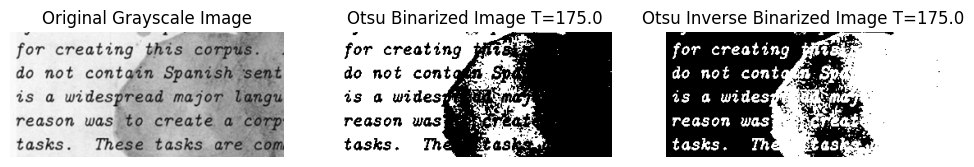

In [20]:
# Load an image
image = cv2.imread("images/scanned_doc.png")
# convert the image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image using thresholding
(T, binarizedImage) = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("Threshold value with Otsu binarization", T)

# Binarization with inverse thresholding
(Ti, inverseBinarizedImage) = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("Threshold value with Otsu inverse binarization", Ti)

# Show the original grayscale image, binarized image, and inverse binarized image using matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binarizedImage, cmap='gray')
plt.title(f"Otsu Binarized Image T={T}")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(inverseBinarizedImage, cmap='gray')
plt.title(f"Otsu Inverse Binarized Image T={Ti}")
plt.axis("off")

plt.show()

## Edge Detection & Contours

### Gradient-Based Edge Detection

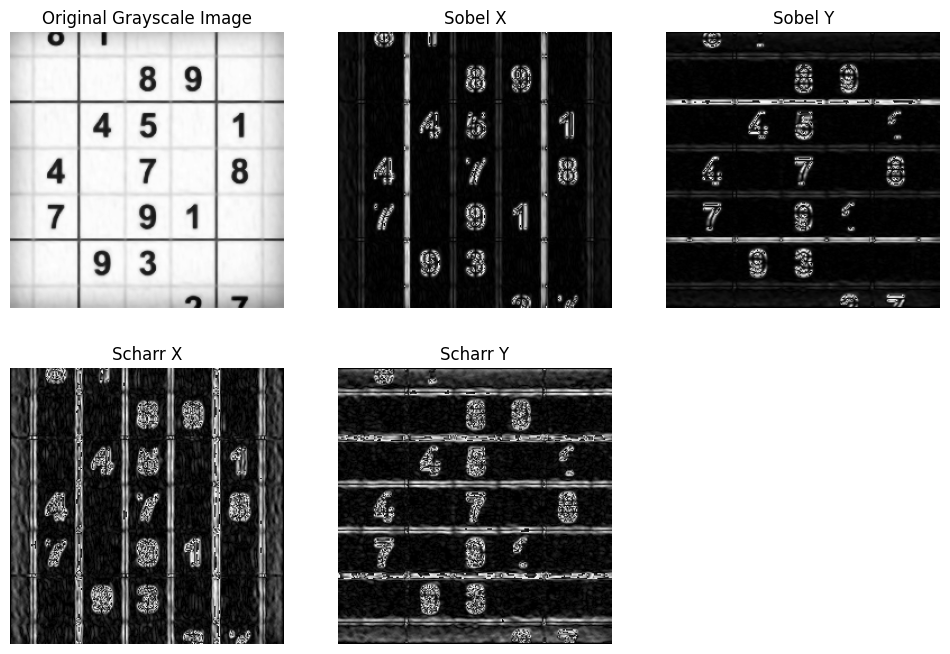

In [21]:
# Load an image
image = cv2.imread("images/sudoku.png")

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.bilateralFilter(image, 5, 50, 50)

# Sobel gradient detection
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=3)
sobelx = np.uint8(np.absolute(sobelx))
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=3)
sobely = np.uint8(np.absolute(sobely))

# Scharr gradient detection by passing ksize = -1 to Sobel function
""" 
A data type, cv2.CV_64F, which is a 64-bit float. Why? The transition
from black to white is considered a positive slope, while the transition
from white to black is a negative slope. An 8-bit unsigned integer
cannot hold a negative number. Therefore, we need to use a 64-bit
float; otherwise, we will lose gradients when the transition from
white to black happens.
"""
scharx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=-1)
"""
simply takes the absolute value of the gradients and converts them back to
8-bit unsigned integers. 
Remember, an image is represented as an 8-bit unsigned integer
NumPy array.
"""
scharx = np.uint8(np.absolute(scharx))
schary = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=-1)
schary = np.uint8(np.absolute(schary))

# Show the original grayscale image, the blurred image, Sobel x and y images, and Scharr x and y images using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title("Sobel X")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title("Sobel Y")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(scharx, cmap='gray')
plt.title("Scharr X")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(schary, cmap='gray')
plt.title("Scharr Y")
plt.axis("off")

plt.show()

### Laplace Derivatives

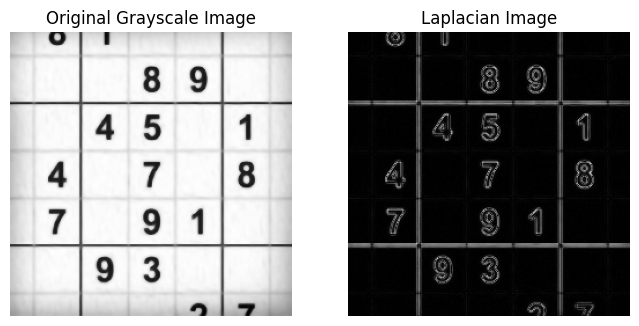

In [22]:
# Load an image
image = cv2.imread("images/sudoku.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image = cv2.bilateralFilter(image, 5, 50, 50)

# Laplace function for edge detection
laplace = cv2.Laplacian(image,cv2.CV_64F)
laplace = np.uint8(np.absolute(laplace))

# Show the original grayscale image and the Laplacian image using matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(laplace, cmap='gray')
plt.title("Laplacian Image")
plt.axis("off")

plt.show()

### Cannt Edge Detection

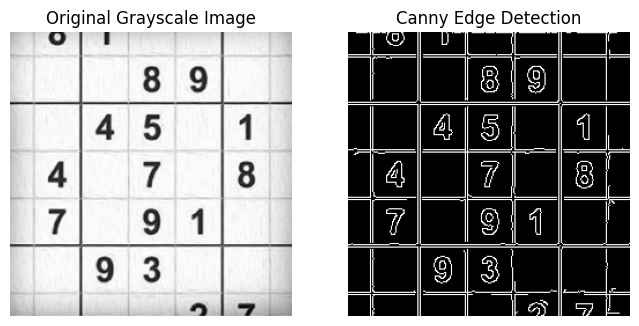

In [23]:
# Load an image
image = cv2.imread("images/sudoku.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
("Blurred image", image)
# Canny function for edge detection
canny = cv2.Canny(image, 50, 120)

# Show the original grayscale image and the Canny edge-detected image using matplotlib
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.show()

### Contours

Number of contours determined are  45


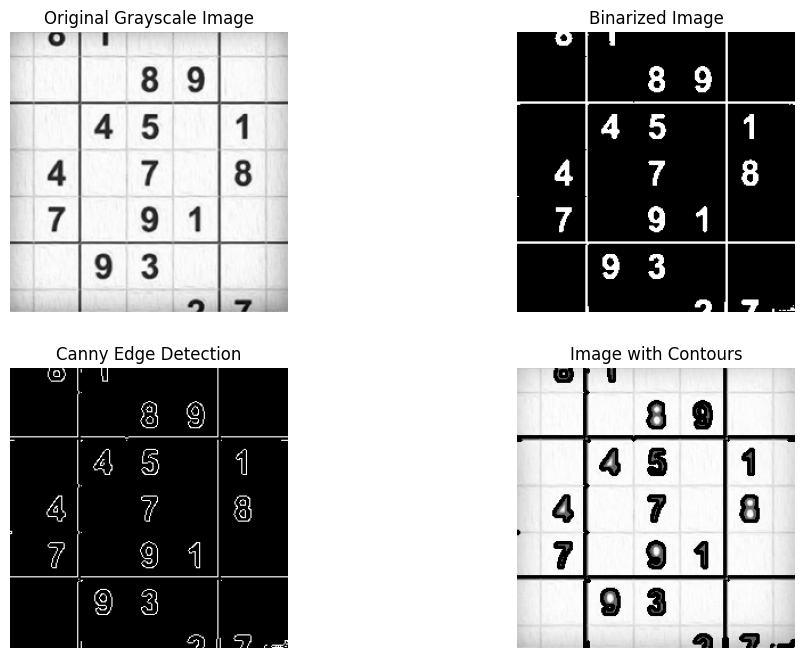

In [24]:
# Load an image
image = cv2.imread("images/sudoku.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize the image
(T,binarized) = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Canny function for edge detection
canny = cv2.Canny(binarized, 0, 255)

"""
• The first argument is the image in which we want to detect the edges using Canny function.
• The second argument, cv2.RET_EXTERNAL, determines the type of contour we are interested in. 
  cv2.RET_EXTERNAL retrieves the outermost contours only. 
  We can also use cv2.RET_LIST to retrieve all contours, cv2.RET_COMP and cv2.RET_TREE, to include hierarchical contours.
• The third argument, cv2.CHAIN_APPROAX_SIMPLE, removes the redundant points and compresses the contour, 
  thereby saving memory. 
  cv2.CHAIN_APPROAX_NONE stores all points of the contour (which require more memory to store them).
"""

(contours, hierarchy) = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours determined are ", format(len(contours)))

"""
The output of the findContours() function is a tuple with the following items in it:
    • The first item is a Python list of all the contours in the image. Each individual contour is a NumPy 
      array of (x,y) coordinates of boundary points of the object.
    • The second item is the contour hierarchy.
"""

copiedImage = image.copy()
"""
drawContours() function gets the following are arguments:
    • The first argument is the image in which contours are to be drawn.
    • The second argument is the list of all contour points.
    • The third argument is the index of the contour to be drawn. 
      To draw the first contour, pass a 0. Similarly, pass 1 to draw the second contour, and so on. 
      If you want to draw all contours, pass -1 to this argument.
    • The fourth argument is the color of the contour.
    • The final argument is the thickness of the contour.
"""
cv2.drawContours(copiedImage, contours, -1, (0,255,0), 2)

# Show the original grayscale image, binarized image, Canny edge-detected image, and the image with contours using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(binarized, cmap='gray')
plt.title("Binarized Image")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(canny, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(copiedImage, cmap='gray')
plt.title("Image with Contours")
plt.axis("off")

plt.show()

## Morphological Tranasformations

### All Operations

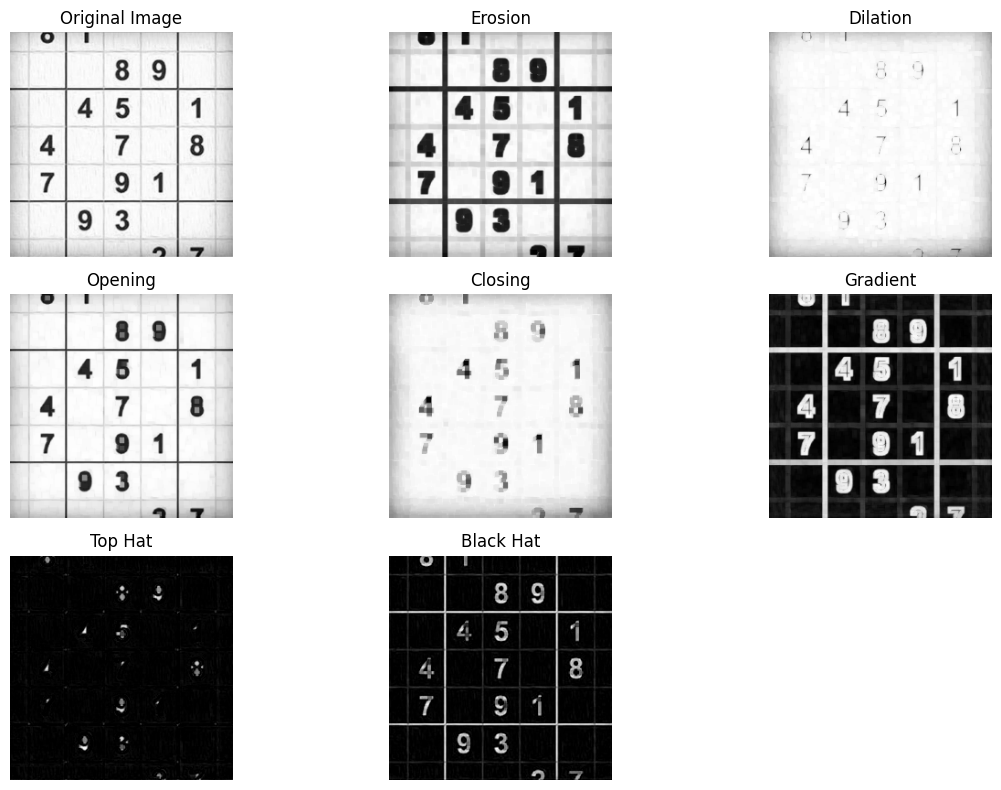

In [25]:
image = cv2.imread("images/sudoku.png", cv2.IMREAD_GRAYSCALE)
# Define the structuring element
kernel = np.ones((5, 5), np.uint8)

# Perform erosion
erosion = cv2.erode(image, kernel, iterations=1)

# Perform dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# Perform opening
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform closing
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Perform morphological gradient
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# Perform top hat
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Perform black hat
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

# Show the original grayscale image and the results of morphological operations using matplotlib
plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(gradient, cmap='gray')
plt.title("Gradient")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(tophat, cmap='gray')
plt.title("Top Hat")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(blackhat, cmap='gray')
plt.title("Black Hat")
plt.axis("off")

plt.tight_layout()
plt.show()

## Tempalte Matching

### Basic Template Matching

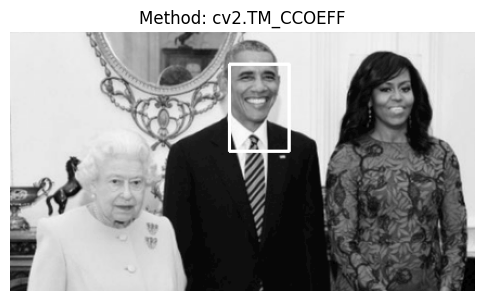

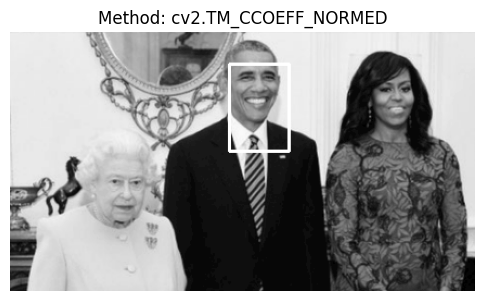

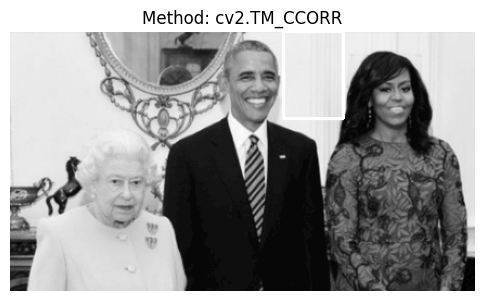

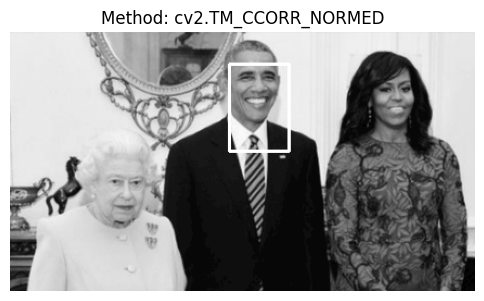

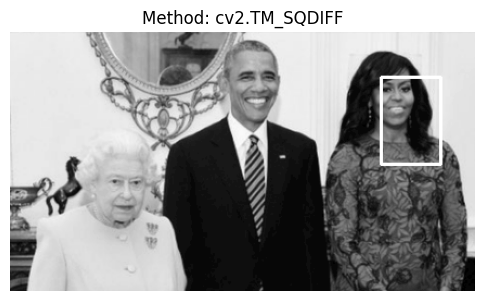

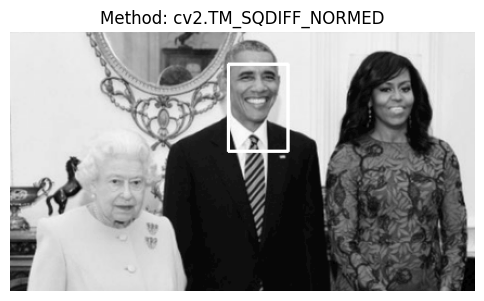

In [26]:
target = cv2.imread('images/obama_with_people.png', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('images/obama_face.png', cv2.IMREAD_GRAYSCALE)
# Resize the template so that the dimensions of template are smaller than the target's
template = cv2.resize(template, None, fx=0.2, fy=0.2)

w, h = template.shape[::-1]
# All 6 supported comparison methods by OpenCV
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# Loop over the methods
for m in methods:
    # creates a copy of the original target image, because the image will be modified when a rectangle is drawn on it
    img = target.copy()
    method = eval(m)
    # Apply template Matching
    result = cv2.matchTemplate(img, template, method)
    #  calculate the coordinates of the bounding box for the matched portion of the target image
    # ///////////////////////////////////////////////////////////////
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum,
    # else take maximum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # ///////////////////////////////////////////////////////////////
    
    # draws a rectangle around the matched section on the target image
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    # displays the resulting image with the drawn rectangle using matplotlib
    plt.figure(figsize=(6, 4))
    plt.imshow(img, cmap='gray')
    plt.title(f'Method: {m}')
    plt.axis('off')